In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
import re
import pickle
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from time import time
from IPython.display import display
from sklearn.model_selection import train_test_split

In [16]:
from xgboost.sklearn import XGBClassifier

In [17]:
dataset_v1=pd.read_csv('model_data_v1.csv', index_col='Unnamed: 0')

In [18]:
dataset_v1.head()

,Travel,Reality,Romance,LiveTV,Comedy,Teen,Horror,Awards,Science,Thriller,...,dow_4,dow_5,dow_6,dow_7,title_count,genres_count,cities_count,tod_count,dow_count,y_segment
train-1,0,1,0,0,0,0,0,0,0,0,...,1,1,1,1,60,3,2,14,7,0
train-10,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,70,2,3,16,7,0
train-100,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,2,2,1,3,1,0
train-1000,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,8,2,3,6,5,0
train-10000,0,1,0,0,0,0,0,0,0,0,...,1,0,1,1,11,3,2,9,5,0


In [19]:
dataset_v1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, train-1 to train-99999
Data columns (total 33 columns):
Travel          200000 non-null int64
Reality         200000 non-null int64
Romance         200000 non-null int64
LiveTV          200000 non-null int64
Comedy          200000 non-null int64
Teen            200000 non-null int64
Horror          200000 non-null int64
Awards          200000 non-null int64
Science         200000 non-null int64
Thriller        200000 non-null int64
Wildlife        200000 non-null int64
Kids            200000 non-null int64
TalkShow        200000 non-null int64
Drama           200000 non-null int64
Action          200000 non-null int64
Mythology       200000 non-null int64
Documentary     200000 non-null int64
Family          200000 non-null int64
Crime           200000 non-null int64
Sports          200000 non-null int64
dow_1           200000 non-null int64
dow_2           200000 non-null int64
dow_3           200000 non-null int64
dow_4    

In [20]:
dataset_v1.columns


Index(['Travel', 'Reality', 'Romance', 'LiveTV', 'Comedy', 'Teen', 'Horror',
       'Awards', 'Science', 'Thriller', 'Wildlife', 'Kids', 'TalkShow',
       'Drama', 'Action', 'Mythology', 'Documentary', 'Family', 'Crime',
       'Sports', 'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6', 'dow_7',
       'title_count', 'genres_count', 'cities_count', 'tod_count', 'dow_count',
       'y_segment'],
      dtype='object')

In [21]:
label=dataset_v1.iloc[:,-1]


In [22]:
data=dataset_v1.iloc[:,0:-1]

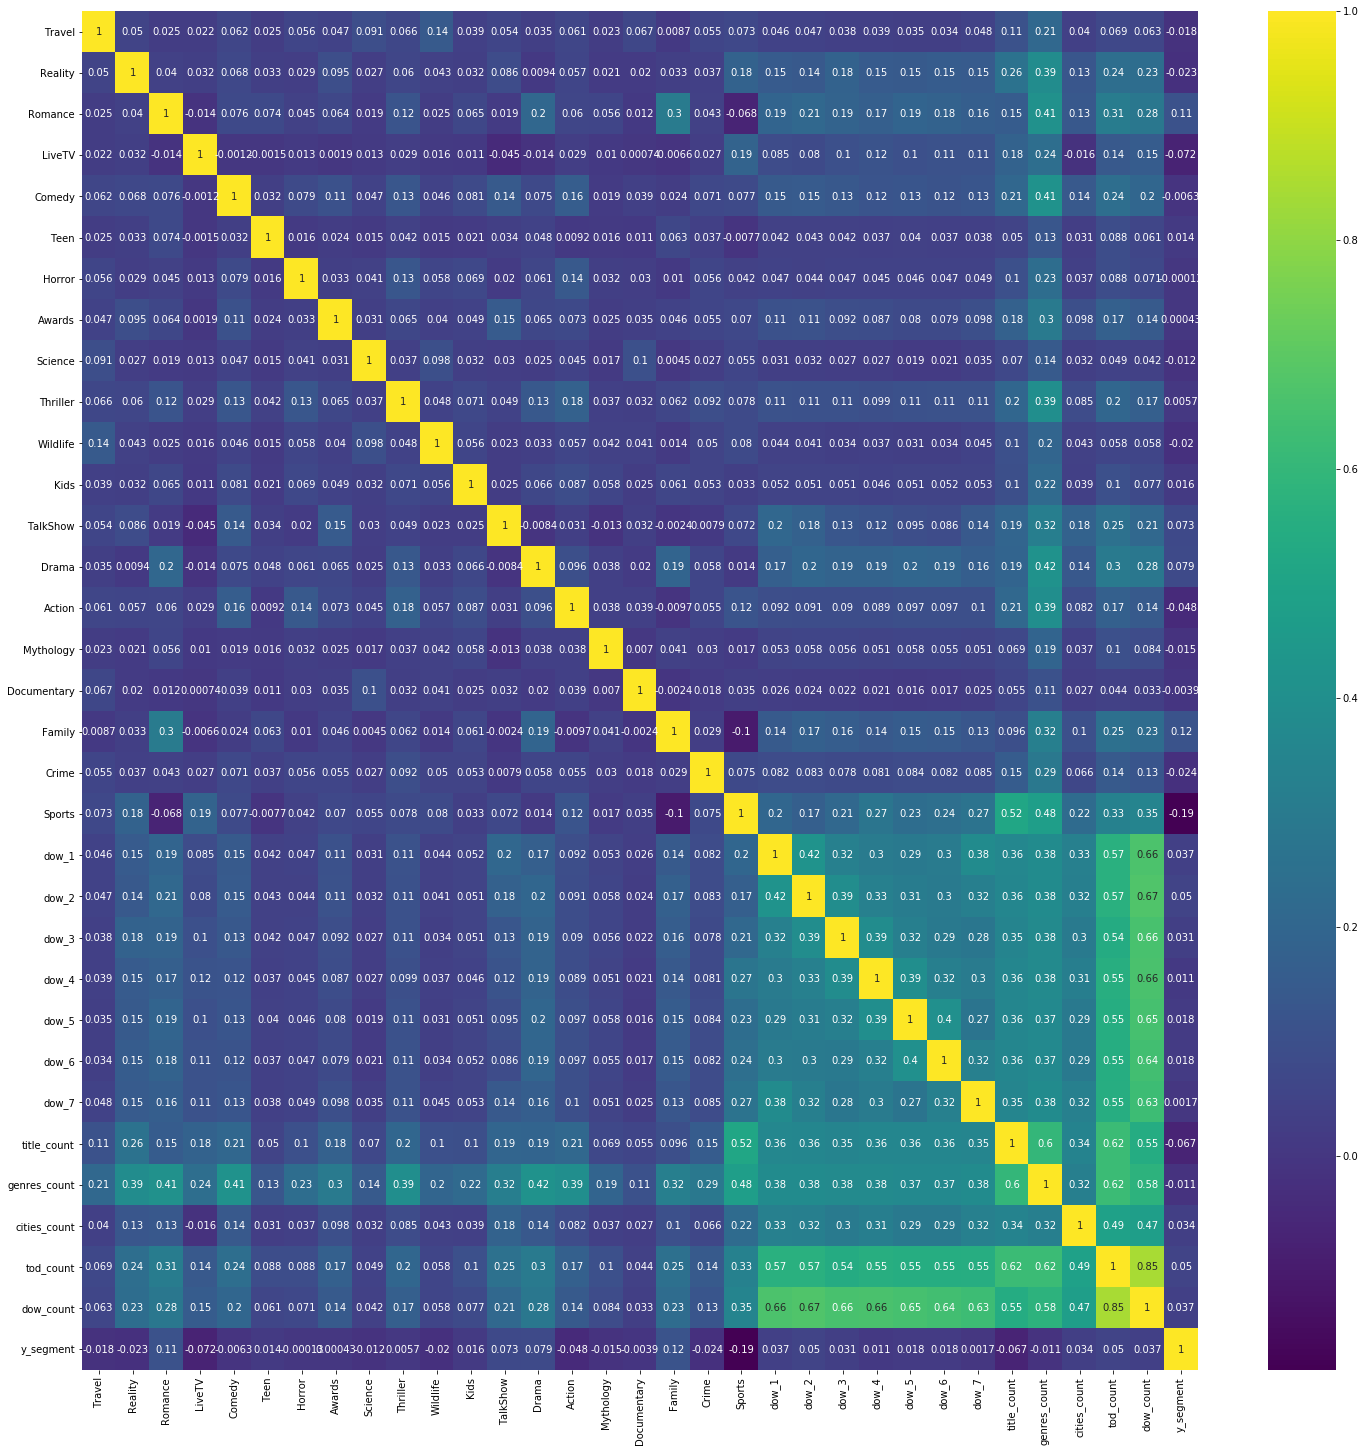

In [23]:
plt.figure(figsize=(25,25))
sns.heatmap(dataset_v1.corr(), cmap='viridis',annot=True)

In [24]:
train , test, train_label, test_label = train_test_split(data, label, random_state=42, test_size=0.2)

xtrain, xvalid, ytrain, yvalid = train_test_split(train, train_label, random_state=42, test_size=0.3)

In [25]:
# Getting the count of the labels in the train data:
unique_elements_train, counts_elements_train = np.unique(ytrain, return_counts=True)
print("Frequency of unique values of the train set:")
print(np.asarray((unique_elements_train, counts_elements_train)))

Frequency of unique values of the train set:
[[     0      1]
 [103491   8509]]


In [26]:
#Getting the count of the labels in the validation data:
unique_elements_valid, counts_elements_valid = np.unique(yvalid, return_counts=True)
print("Frequency of unique values of the validation set:")
print(np.asarray((unique_elements_valid, counts_elements_valid)))

Frequency of unique values of the validation set:
[[    0     1]
 [44391  3609]]


In [27]:
# Getting the count of the labels in the test data:
unique_elements_test, counts_elements_test = np.unique(test_label, return_counts=True)
print("Frequency of unique values of the test set:")
print(np.asarray((unique_elements_test, counts_elements_test)))

Frequency of unique values of the test set:
[[    0     1]
 [36863  3137]]


In [35]:
from sklearn import metrics
def train_predict(learner, X_train, y_train, X_test, y_test):

    results = {}

    start = time() # Get start time
    learner = learner.fit(X_train, y_train)
    end = time() # Get end time

    train_time = end - start

    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time

    pred_time = end - start

    acc_train = accuracy_score(y_train, predictions_train)


    acc_test = accuracy_score(y_test, predictions_test)


    print("{} trained.".format(learner.__class__.__name__))
    #Print model report:
    print("\nModel Report")
    print("--"*10)
    print("Accuracy train: %.4g" % acc_train)
    print("AUC Score (Train): %f" % metrics.roc_auc_score( y_train, predictions_train))
    print("train time:" %acc_train )
    print("--"*10)
    print("Accuracy test: %.4g" % acc_test)
    print("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, predictions_test))
    print("test time:"%acc_test)
    print("--"*10)
    print("test statistics:")
    print("--"*10)
    print(metrics.classification_report(y_test, predictions_test))
    print("--"*10)
    print(metrics.confusion_matrix(y_test, predictions_test))
    print("--"*10)
    feat_imp = pd.Series(learner.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    print("--"*10)

    # Return the results
    return results

In [36]:
xgb1 = XGBClassifier(
learning_rate =0.1,
n_estimators=1000,
max_depth=5,
min_child_weight=1,
gamma=0,
subsample=0.8,
colsample_bytree=0.8,
objective= 'binary:logistic',
nthread=4,
scale_pos_weight=1,
seed=27)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


XGBClassifier trained.

Model Report
--------------------
Accuracy train: 0.9292
AUC Score (Train): 0.537626
train time:
--------------------
Accuracy test: 0.9236
AUC Score (Test): 0.505340
test time:
--------------------
test statistics:
--------------------
             precision    recall  f1-score   support

          0       0.93      1.00      0.96     44391
          1       0.31      0.01      0.03      3609

avg / total       0.88      0.92      0.89     48000

--------------------
[[44287   104]
 [ 3562    47]]
--------------------
--------------------


{}

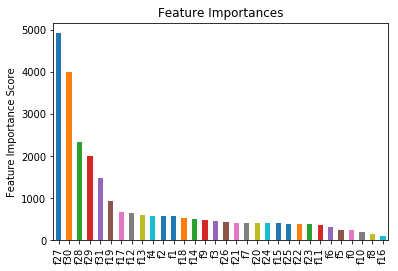

In [37]:
train_predict(xgb1, xtrain.values, ytrain.values, xvalid.values, yvalid.values)

## Tune 1:Tune max depth and min child:

In [39]:
from sklearn.model_selection import GridSearchCV
param_test1 = {
'max_depth':range(3,10,2),
'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5, 
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, 
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(xtrain,ytrain)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.79771, std: 0.00268, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.79770, std: 0.00276, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.79771, std: 0.00261, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.79894, std: 0.00276, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.79861, std: 0.00212, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.79892, std: 0.00262, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.79495, std: 0.00289, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.79602, std: 0.00307, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.79602, std: 0.00314, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.78907, std: 0.00386, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.79120, std: 0.00389, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.79174, std: 0.00399, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 5, 'min_child_weight': 1

In [41]:
param_test1 = {
'max_depth':[4,5,6],
'min_child_weight':[1,2,3]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5, 
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, 
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(xtrain,ytrain)
gsearch2.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

KeyboardInterrupt: 